In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyhf
from pyhf import hfpdf
def prep_data(observed_counts,nominal_background,nominal_signals):
    spec = {
        'singlechannel': {
            'signal': {
                'data': nominal_signals,
                'mods': [
                    {
                        'name': 'mu',
                        'type': 'normfactor',
                        'data': None
                    }
                ]
            },
            'background': {
                'data': nominal_background,
                'mods': [
                    {
                        'name': 'bkg_norm',
                        'type': 'normsys',
                        'data': {'lo': 0.90, 'hi': 1.10}
                    }
                ]
            }
        }
    }
    pdf  = hfpdf(spec)
    data = observed_counts + pdf.auxdata
    return data, pdf

In [5]:
source = {
  "binning": [2,-0.5,1.5],
  "bindata": {
    "data":    [120.0, 180.0],
    "bkg":     [100.0, 150.0],
    "bkgerr":  [15.0, 20.0],
    "sig":     [30.0, 95.0]
  }
}
d,pdf = prep_data(source['bindata']['data'],source['bindata']['bkg'],source['bindata']['sig'])

init_pars = [0.0,0.0]
par_bounds = [[0,10],[-5,5]]

unconpars = pyhf.unconstrained_bestfit(d,pdf,init_pars,par_bounds)
print ('UNCON',unconpars)


conpars = pyhf.constrained_bestfit(0.0,d,pdf,init_pars,par_bounds)
print ('CONS', conpars)


print (pdf.expected_data(conpars))

# print '????',aux
aux = pdf.expected_auxdata(conpars)
# print '????',aux

print ('ASIMOV',pyhf.generate_asimov_data(0.0,d,pdf,init_pars,par_bounds))

UNCON [0.34462823 0.29864797]
CONS [1.37388431 0.        ]
[113.99052674 170.98579012   1.37388431]
ASIMOV [113.99052674 170.98579012   1.37388431]


/Users/lukas/Code/histfactory/pyhf/pyhf/__init__.py:386: RuntimeWarning: divide by zero encountered in double_scalars
  CLs  = CLb/CLsb


{'exp': [0.23237565782828395,
  0.30885710370072095,
  0.4181527614017232,
  0.5702900648060988,
  0.7349341797352776],
 'obs': 0.6006725731070515}

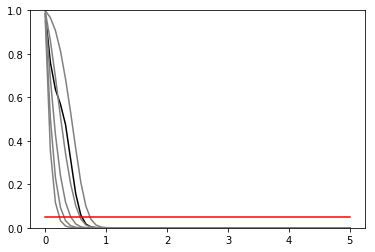

In [6]:
def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

def CLsOnePoint(muTest,d,pdf, init_pars,par_bounds):
    clsobs, cls_exp = pyhf.runOnePoint(muTest, d,pdf,init_pars,par_bounds)[-2:]
    return 1./clsobs, [1./x for x in cls_exp]

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross


CLsOnePoint(1.0,d,pdf,init_pars,par_bounds)


mutests = np.linspace(0,5,61)
tests = [CLsOnePoint(muTest,d,pdf,init_pars,par_bounds) for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]

plot_results(mutests, cls_obs, cls_exp)

invert_interval(mutests, cls_obs, cls_exp)


